# Vocabulary Size를 변경해서 시도해보기

## 1. 모듈 가져오기

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 2. 데이터 가져오기

### 1. 모든 단어  사용



In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [5]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


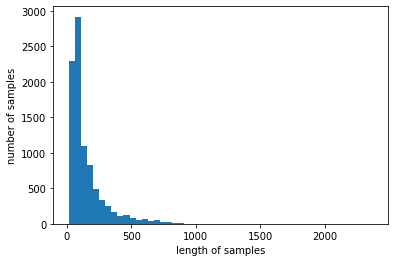

In [6]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [7]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

565248/550378 [==============================] - 0s 0us/step


In [8]:
index_to_word = {index + 3 : word for word, index in word_index.items()}

In [11]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


전체 데이터 변환(train, test)

In [12]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

In [13]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

## 3. 벡터화 하기

Document Term Matrix, DTM을 활용한 TF-IDF행렬로 벡터화

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# DTM 생성
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

# TF-IDF 생성
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)
(8982, 26506)


## 4. 머신러닝 모델학습

나이브 베이즈 분류기

Complement Naive Bayes Classifier, CNB

로지스틱 회귀

서포트 벡터 머신(SVM)

결정 트리

랜덤 포레스트

그래디언트 부스팅 트리

보팅

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [32]:
# 나이브 베이즈 분류기
print("[나이브 베이즈 분류기]")
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("- 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[나이브 베이즈 분류기의 Classification Report]")

report = classification_report(y_test, mod.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

[나이브 베이즈 분류기]
- 정확도: 0.5997328584149599


[나이브 베이즈 분류기의 Classification Report]
Average F1-score:  0.60


In [34]:
# CNB
print("[CNB]")
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[CNB의 Classification Report]")

report = classification_report(y_test, cb.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

[CNB]
정확도: 0.7649154051647373


[CNB의 Classification Report]
Average F1-score:  0.76


In [35]:
# 로지스틱 회귀
print("[로지스틱 회귀]")
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[로지스틱 회귀의 Classification Report]")

report = classification_report(y_test, lr.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

[로지스틱 회귀]
정확도: 0.813446126447017


[로지스틱 회귀의 Classification Report]
Average F1-score:  0.81


In [36]:
# 서포트 벡터 머신
print("[서포트 벡터 머신]")
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[서포트 벡터 머신의 Classification Report]")

report = classification_report(y_test,lsvc.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

[서포트 벡터 머신]
정확도: 0.776046304541407


[서포트 벡터 머신의 Classification Report]
Average F1-score:  0.78


In [37]:
# 결정 트리
print("[결정 트리]")
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[결정 트리의 Classification Report]")

report = classification_report(y_test,tree.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

[결정 트리]
정확도: 0.6211041852181657


[결정 트리의 Classification Report]
Average F1-score:  0.62


In [38]:
# 랜덤 포레스트
print("[랜덤 포레스트]")
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[랜덤 포레스트의 Classification Report]")

report = classification_report(y_test,forest.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

[랜덤 포레스트]
정확도: 0.6544968833481746


[랜덤 포레스트의 Classification Report]
Average F1-score:  0.65


In [39]:
# 그래디언트 부스팅 트리
print("[그래디언트 부스팅 트리]")
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[그래디언트 부스팅 트리의 Classification Report]")

report = classification_report(y_test,grbt.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

[그래디언트 부스팅 트리]
정확도: 0.7702582368655387


[그래디언트 부스팅 트리의 Classification Report]
Average F1-score:  0.77


In [41]:
# 보팅
print("[보팅]")
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[보팅의 Classification Report]")

report = classification_report(y_test,voting_classifier.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

[보팅]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.8187889581478184


[보팅의 Classification Report]
Average F1-score:  0.82


### 2. 5000개 단어 사용

In [46]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [47]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

In [48]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)
(8982, 4867)


In [49]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

In [50]:
# 나이브 베이즈 분류기
print("[나이브 베이즈 분류기]")
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("- 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[나이브 베이즈 분류기의 Classification Report]")

report = classification_report(y_test, mod.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# CNB
print("[CNB]")
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[CNB의 Classification Report]")

report = classification_report(y_test, cb.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# 로지스틱 회귀
print("[로지스틱 회귀]")
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[로지스틱 회귀의 Classification Report]")

report = classification_report(y_test, lr.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# 서포트 벡터 머신
print("[서포트 벡터 머신]")
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[서포트 벡터 머신의 Classification Report]")

report = classification_report(y_test,lsvc.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# 결정 트리
print("[결정 트리]")
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[결정 트리의 Classification Report]")

report = classification_report(y_test,tree.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# 랜덤 포레스트
print("[랜덤 포레스트]")
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[랜덤 포레스트의 Classification Report]")

report = classification_report(y_test,forest.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# 그래디언트 부스팅 트리
print("[그래디언트 부스팅 트리]")
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[그래디언트 부스팅 트리의 Classification Report]")

report = classification_report(y_test,grbt.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# 보팅
print("[보팅]")
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[보팅의 Classification Report]")

report = classification_report(y_test,voting_classifier.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

[나이브 베이즈 분류기]
- 정확도: 0.6731967943009796


[나이브 베이즈 분류기의 Classification Report]
Average F1-score:  0.67
[CNB]
정확도: 0.7707034728406055


[CNB의 Classification Report]
Average F1-score:  0.77
[로지스틱 회귀]
정확도: 0.8058771148708815


[로지스틱 회귀의 Classification Report]
Average F1-score:  0.81
[서포트 벡터 머신]
정확도: 0.7729296527159395


[서포트 벡터 머신의 Classification Report]
Average F1-score:  0.77
[결정 트리]
정확도: 0.6179875333926982


[결정 트리의 Classification Report]
Average F1-score:  0.62
[랜덤 포레스트]
정확도: 0.701246660730187


[랜덤 포레스트의 Classification Report]
Average F1-score:  0.70
[그래디언트 부스팅 트리]
정확도: 0.767586821015138


[그래디언트 부스팅 트리의 Classification Report]
Average F1-score:  0.77
[보팅]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.8161175422974176


[보팅의 Classification Report]
Average F1-score:  0.82


### 3. 10000개 단어 사용

In [51]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [52]:
decoded= []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

(8982, 9670)
(8982, 9670)


In [53]:
# 나이브 베이즈 분류기
print("[나이브 베이즈 분류기]")
mod = MultinomialNB()
mod.fit(tfidfv, y_train)

predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("- 정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[나이브 베이즈 분류기의 Classification Report]")

report = classification_report(y_test, mod.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# CNB
print("[CNB]")
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[CNB의 Classification Report]")

report = classification_report(y_test, cb.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# 로지스틱 회귀
print("[로지스틱 회귀]")
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[로지스틱 회귀의 Classification Report]")

report = classification_report(y_test, lr.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# 서포트 벡터 머신
print("[서포트 벡터 머신]")
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[서포트 벡터 머신의 Classification Report]")

report = classification_report(y_test,lsvc.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# 결정 트리
print("[결정 트리]")
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[결정 트리의 Classification Report]")

report = classification_report(y_test,tree.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# 랜덤 포레스트
print("[랜덤 포레스트]")
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[랜덤 포레스트의 Classification Report]")

report = classification_report(y_test,forest.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# 그래디언트 부스팅 트리
print("[그래디언트 부스팅 트리]")
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[그래디언트 부스팅 트리의 Classification Report]")

report = classification_report(y_test,grbt.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

# 보팅
print("[보팅]")
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print("\n")
print("[보팅의 Classification Report]")

report = classification_report(y_test,voting_classifier.predict(tfidfv_test))
lines = report.split('\n')
average_line = lines[-4]
average_data = average_line.split()

# 추출된 average 데이터 출력
print("Average F1-score: ", average_data[1])

[나이브 베이즈 분류기]
- 정확도: 0.6567230632235085


[나이브 베이즈 분류기의 Classification Report]
Average F1-score:  0.66
[CNB]
정확도: 0.7707034728406055


[CNB의 Classification Report]
Average F1-score:  0.77
[로지스틱 회귀]
정확도: 0.8076580587711487


[로지스틱 회귀의 Classification Report]
Average F1-score:  0.81
[서포트 벡터 머신]
정확도: 0.780053428317008


[서포트 벡터 머신의 Classification Report]
Average F1-score:  0.78
[결정 트리]
정확도: 0.6202137132680321


[결정 트리의 Classification Report]
Average F1-score:  0.62
[랜덤 포레스트]
정확도: 0.674087266251113


[랜덤 포레스트의 Classification Report]
Average F1-score:  0.67
[그래디언트 부스팅 트리]
정확도: 0.7662511130899377


[그래디언트 부스팅 트리의 Classification Report]
Average F1-score:  0.77
[보팅]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.8116651825467498


[보팅의 Classification Report]
Average F1-score:  0.81


## 5. 딥러닝 모델학습

In [92]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

In [93]:
decoded= []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

(8982, 9670)
(8982, 9670)


In [94]:
import scipy
from tensorflow.keras.utils import to_categorical

tfidfv = scipy.sparse.csr_matrix.toarray(tfidfv)

In [95]:
print(y_train.shape)
print(y_test.shape)
     
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
     

(8982,)
(2246,)


In [74]:
tfidfv_arr = tfidfv.toarray()
tfidfv_dense = tfidfv.todense()

In [75]:
tfidfv_test_arr = tfidfv_test.toarray()
tfidfv_test_dense = tfidfv_test.todense()

In [96]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.datasets import reuters

vocab_size = 10000
word_vector_dim = 32  

model_LSTM = keras.Sequential()
model_LSTM.add(keras.layers.Embedding(vocab_size, word_vector_dim))
model_LSTM.add(keras.layers.LSTM(32))
model_LSTM.add(keras.layers.Dense(128, activation='relu'))  
model_LSTM.add(keras.layers.Dense(num_classes, activation='softmax'))  

model_LSTM.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_13 (Dense)             (None, 46)                5934      
Total params: 338,478
Trainable params: 338,478
Non-trainable params: 0
_________________________________________________________________


In [97]:
model_LSTM.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model_LSTM.fit(tfidfv_arr,
                    y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
57/57 [==============================] - 48s 282ms/step - loss: 0.3634 - accuracy: 0.0792 - val_loss: 0.0779 - val_accuracy: 0.3450
Epoch 2/20
57/57 [==============================] - 15s 268ms/step - loss: 0.0736 - accuracy: 0.3534 - val_loss: 0.0722 - val_accuracy: 0.3450
Epoch 3/20
57/57 [==============================] - 15s 268ms/step - loss: 0.0720 - accuracy: 0.3534 - val_loss: 0.0720 - val_accuracy: 0.3450
Epoch 4/20
57/57 [==============================] - 15s 268ms/step - loss: 0.0719 - accuracy: 0.3534 - val_loss: 0.0719 - val_accuracy: 0.3450
Epoch 5/20
57/57 [==============================] - 15s 268ms/step - loss: 0.0720 - accuracy: 0.3534 - val_loss: 0.0721 - val_accuracy: 0.3450
Epoch 6/20
57/57 [==============================] - 15s 268ms/step - loss: 0.0718 - accuracy: 0.3534 - val_loss: 0.0720 - val_accuracy: 0.3450
Epoch 7/20
57/57 [==============================] - 15s 270ms/step - loss: 0.0719 - accuracy: 0.3534 - val_loss: 0.0718 - val_accuracy: 0.3450

In [98]:
results = model_LSTM.evaluate(tfidfv_test_arr,  y_test, verbose=2)
print(results)

71/71 - 7s - loss: 0.0720 - accuracy: 0.3620
[0.07201005518436432, 0.36197686195373535]


In [99]:
def visualize_train(train_history):
    # summarize history for accuracy
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.title('accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title('loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

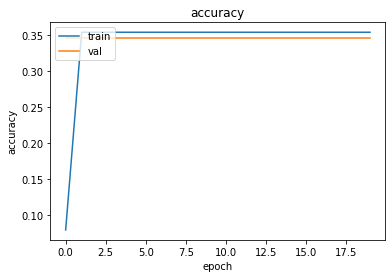

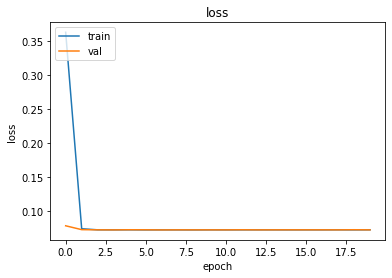

In [101]:
visualize_train(history)

## 6. 결론

| 정확도 | 모든 단어 | 5000 | 10000 |
|---|:---:|---:|---:|
| 나이브 베이즈 분류기 | 0.6 | 0.67 | 0.66 |
| CNB | 0.76 | 0.77 | 0.77 |
| 로지스틱 회귀 | 0.81 | 0.81 | 0.81 |
| 서포트 벡터 머신(SVM) | 0.78 | 0.77 | 0.78 |
| 결정 트리 | 0.62 | 0.62 | 0.62 |
| 랜덤 포레스트 | 0.65 | 0.70 | 0.67 |
| 그래디언트 부스팅 트리 | 0.77 | 0.77 | 0.77 |
| 보팅 | 0.82 | 0.82 | 0.81 |

훈련시간도 짧고

그래디언트 부스팅 트리나 보팅만큼 정확도가 잘 나오기도 했고

F1 점수도 높기 때문에 

로지스틱 회귀가 가장 잘 나온 모델이라고 생각한다